Lab based on: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#About

# Step 1 : Reading and understanding Train and Test Data set


Loading packages and data:


In [3]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

train_original = pd.read_csv("input/train_ctrUa4K.csv")
train = train_original
train.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Reading the name of columns in data set

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test = pd.read_csv("input/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Reading the name of columns in data set:

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# What are the data types present in the data?

Los tipos de datos presentes en el conjunto de datos son:

| Característica | Tipo de dato | Descripción |
| --- | --- | --- |
| Loan_ID | String  | *Identificación única de la solicitud* |
| Gender | String (Categoríca) | *Género del solicitante* |
| Married | String (Categoríca) | *Estado civil del solicitante* |
| Dependents | Integer | *Número de personas dependientes del solicitante* |
| Education | String (Categoríca) | *Nivel de educación del solicitante* |
| Self_Employed | String (Categoríca) | *Indica si el solicitante trabaja como independiente* |
| ApplicantIncome | Entero | *Ingreso mensual del solicitante* |
| CoapplicantIncome | Double | *Ingreso mensual del co-solicitante* |
| LoanAmount | Double | *Cantidad solicitada de préstamo* |
| Loan_Amount_Term | Double | *Plazo del préstamo en meses* |
| Credit_History | Double(Categoríca) | *Clasificación del historial crediticio del solicitante (1 y 0)* |  


Además, el conjunto de datos de entrenamiento tiene una columna adicional llamada `Loan_Status` que indica si la solicitud de préstamo fue aprobada o no.




# **Univariate Analysis**
It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable


### **Visualize features of the data set by graph and get the analysis**

#### *Descripción del dataset*

Tamaño de los conjuntos de datos de entrenamiento y prueba:


In [7]:
train.shape, test.shape

((614, 13), (367, 12))

Es posible observar que el conjunto de datos de entrenamiento tiene 614 observaciones y 13 características, mientras que el conjunto de datos de prueba tiene 367 observaciones y 12 características. La característica adicional en el conjunto de datos de entrenamiento es `Loan_Status`, que indica si la solicitud de préstamo fue aprobada o no.

Valores null en el conjunto de datos de entrenamiento y prueba:

**Conjunto de datos de entrenamiento**

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Es posible observar que las características `Gender`, `Married`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` tienen valores nulos en el conjunto de datos de entrenamiento, los cuales deben ser tratados antes de realizar el análisis, es importante tener en cuenta que la característica `Credit_History` es la que tiene mayor cantidad de valores nulos y debe ser tratada con cuidado,ya que es una característica importante para predecir si la solicitud de préstamo será aprobada o no.

**Conjunto de datos de prueba**

In [9]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Es posible observar que las características `Gender`, `Dependents`, `Self_Employed`, `LoanAmount`, `Loan_Amount_Term` y `Credit_History` tienen valores nulos en el conjunto de datos de prueba, los cuales deben ser tratados antes de realizar el análisis.

Descripción de las características numéricas en el conjunto de datos de entrenamiento:

In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Descripción de las características numéricas en el conjunto de datos de test:

In [11]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


De lo anterior, se puede decir que:
- Las medias de las características en ambos conjuntos de datos son similares, lo que indica que los datos están distribuidos de manera similar en ambos conjuntos.
- Las desviaciones estándar de las características en ambos conjuntos de datos son similares, lo que indica que los datos están dispersos de manera similar en ambos conjuntos.

En general, los datos en ambos conjuntos de datos están distribuidos de manera similar, lo que es importante para el análisis y la construcción de modelos.

#### *Visualización grafica de las características numéricas*	

ApplicantIncome(ingreso mensual del solicitante):

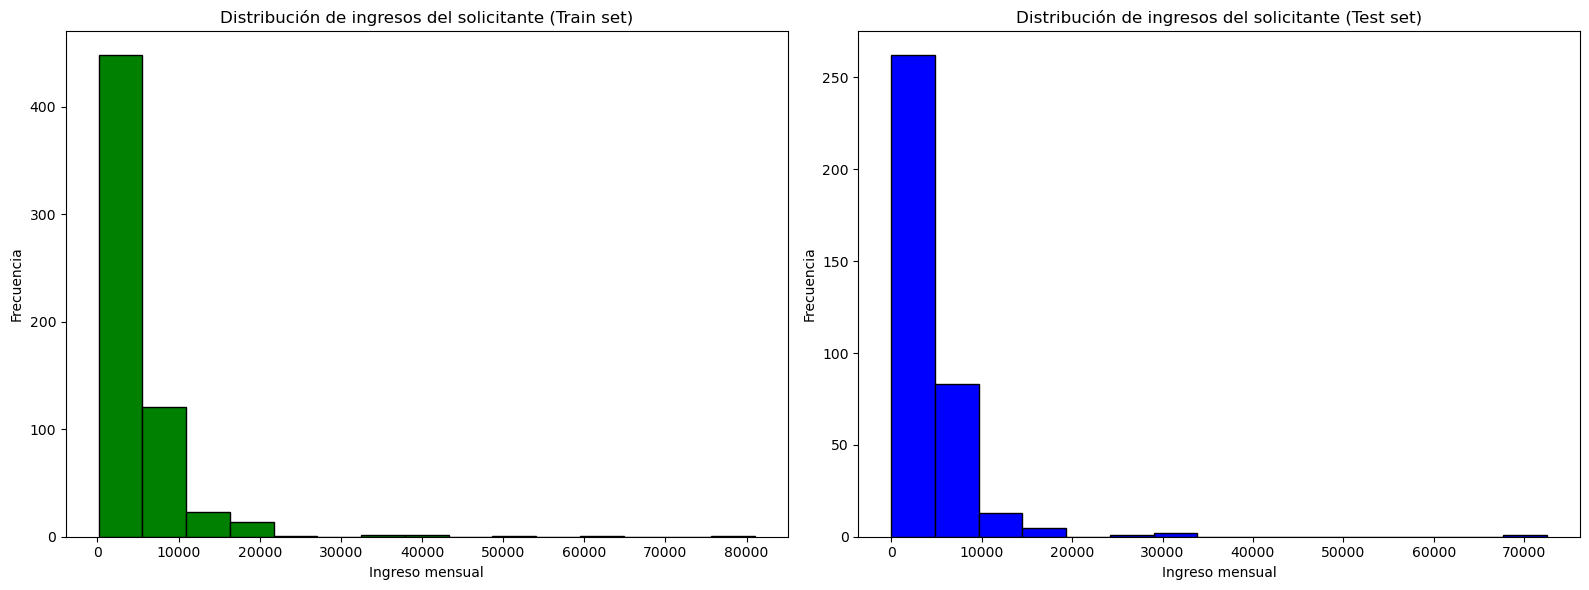

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['ApplicantIncome'], bins=15, color='green', edgecolor='black')
axs[0].set_title('Distribución de ingresos del solicitante (Train set)')
axs[0].set_xlabel('Ingreso mensual')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['ApplicantIncome'], bins=15, color='blue', edgecolor='black')
axs[1].set_title('Distribución de ingresos del solicitante (Test set)')
axs[1].set_xlabel('Ingreso mensual')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Es posible observar que la característica `ApplicantIncome` tiene una distribución sesgada a la izquierda, lo que indica que la mayoría de los solicitantes tienen ingresos bajos, pero hay algunos solicitantes con ingresos muy altos. Como anteriormente se mencionó, los datos están distribuidos de manera similar en ambos conjuntos de datos.

CoapplicantIncome(ingreso mensual del co-solicitante):

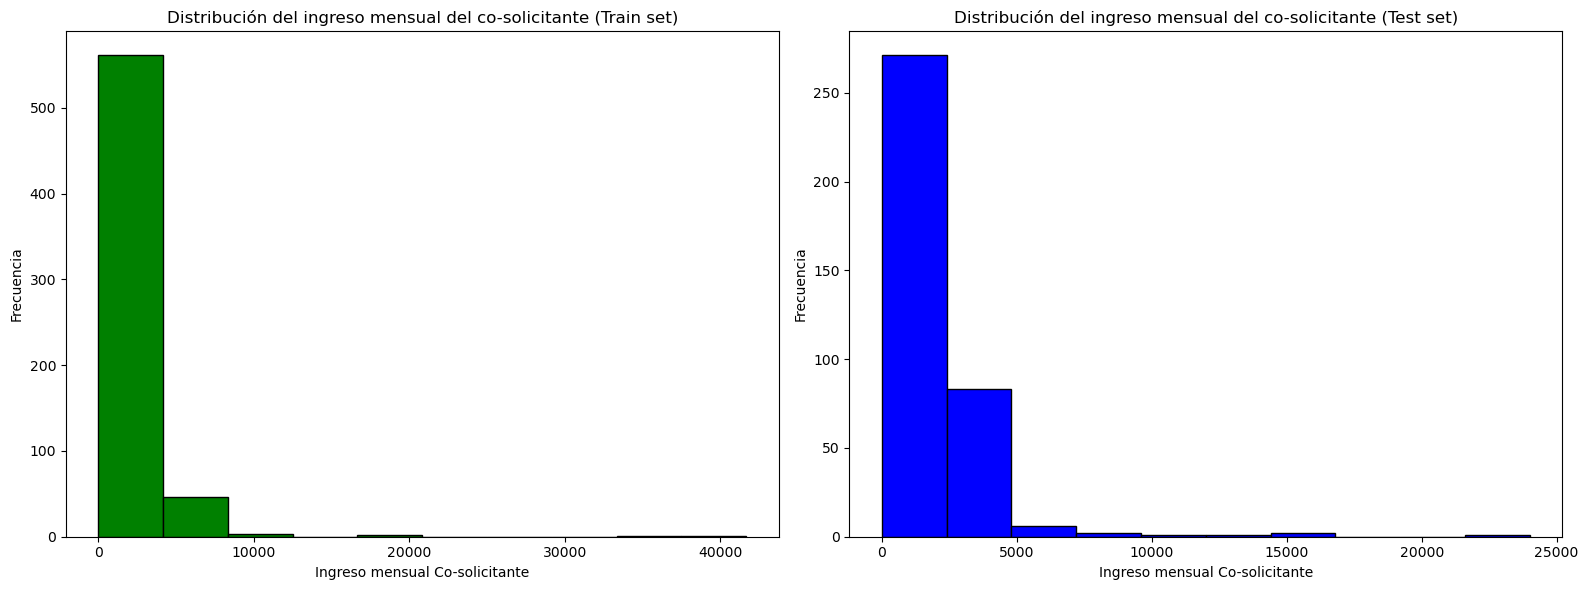

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['CoapplicantIncome'], bins=10, color='green', edgecolor='black')
axs[0].set_title('Distribución del ingreso mensual del co-solicitante (Train set)')
axs[0].set_xlabel('Ingreso mensual Co-solicitante')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['CoapplicantIncome'], bins=10, color='blue', edgecolor='black')
axs[1].set_title('Distribución del ingreso mensual del co-solicitante (Test set)')
axs[1].set_xlabel('Ingreso mensual Co-solicitante')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que la característica `CoapplicantIncome` tiene una distribución sesgada a la izquierda, lo que indica que la mayoría de los co-solicitantes tienen ingresos bajos, pero hay algunos co-solicitantes con ingresos muy altos. Como anteriormente se mencionó, los datos están distribuidos de manera similar en ambos conjuntos de datos.

LoanAmount(cantidad solicitada de préstamo):

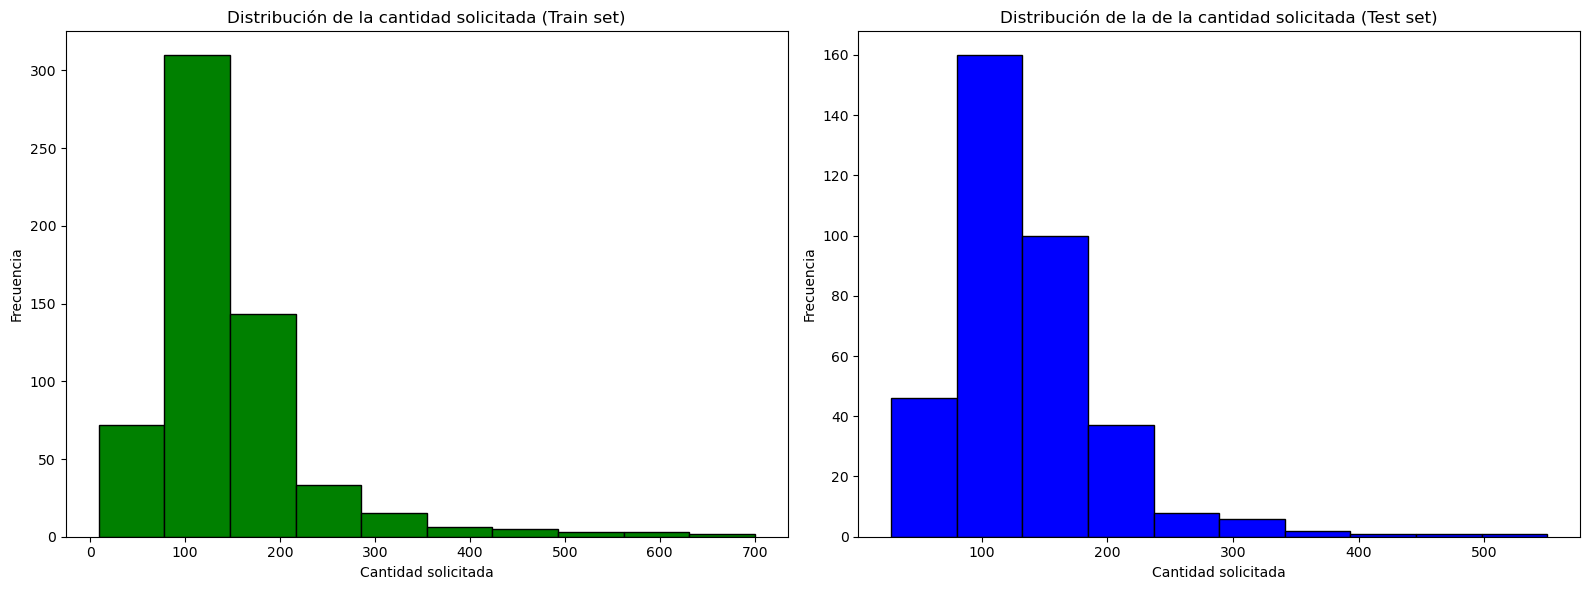

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['LoanAmount'], bins=10, color='green', edgecolor='black')
axs[0].set_title('Distribución de la cantidad solicitada (Train set)')
axs[0].set_xlabel('Cantidad solicitada')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['LoanAmount'], bins=10, color='blue', edgecolor='black')
axs[1].set_title('Distribución de la de la cantidad solicitada (Test set)')
axs[1].set_xlabel('Cantidad solicitada')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Es posible observar que la característica `LoanAmount` no esta tan sesgada hacia la izquierda, como las características anteriores, lo que indica que la mayoría de los solicitantes solicitan préstamos de cantidades similares, a pesar de que hay algunos solicitantes que solicitan préstamos de cantidades muy altas la transición de valores bajos a valores altos es más suave que la de las anteriores variables.

Loan_Amount_Term(plazo del préstamo en meses):

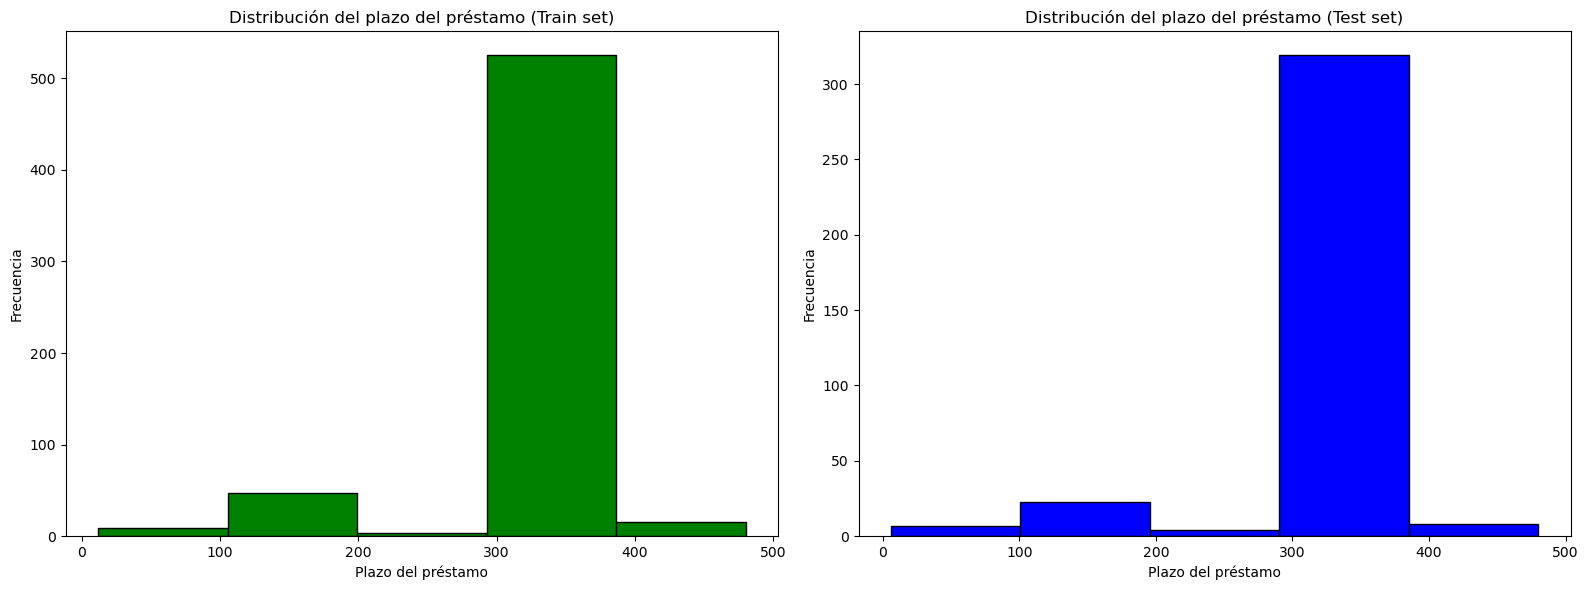

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].hist(train['Loan_Amount_Term'], bins=5, color='green', edgecolor='black')
axs[0].set_title('Distribución del plazo del préstamo (Train set)')
axs[0].set_xlabel('Plazo del préstamo')
axs[0].set_ylabel('Frecuencia')

axs[1].hist(test['Loan_Amount_Term'], bins=5, color='blue', edgecolor='black')
axs[1].set_title('Distribución del plazo del préstamo (Test set)')
axs[1].set_xlabel('Plazo del préstamo')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En ambos conjuntos de datos podemos ver una distribución muy similar, donde la mayoría de los solicitantes solicitan préstamos con un plazo entre 300 y 400 meses, lo que indica que la mayoría de los solicitantes solicitan préstamos a largo plazo.

### **Study categorical features such as Gender, Married, Self_Employed and Credit_History**

Exploración de las características categóricas en el conjunto de datos:

**Género del solicitante:**

In [28]:
train['Gender'].value_counts()


Gender
Male      489
Female    112
Name: count, dtype: int64

In [27]:
test['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

Es posible observar que los unicos generos presentes en el conjunto de datos son `Male` y `Female`, para un total de 489 y 112 respectivamente en el conjunto de datos de entrenamiento, mientras que en el conjunto de datos de prueba hay 286 y 70 respectivamente. Para un total de 775 y 182 en ambos conjuntos de datos, también es posible observar que la mayoría de los solicitantes son hombres.



### visualize the numerical variables: distribution of Applicant income first.

# Bivariate Analysis
Analyse the independent variable with respect to target variable. 

## Use bar plots to vizualice Gender vs Loan_Status, Education vs Loan_Status, Property_Area vs Loan_Status

## identify the most correlated variables to Loan_Status

## Identify, count and treat outliers and missing values

# Model Building 

## Using the train dataset you should be able to select the best model. 
## Use feature selection
## Cross validation
## Try different models such as:

1) Decision Tree Classifier
2) Random Forest Classifier
3) K-Nearest-Neighbors
4) Support Vector Classifier
5) XGBoost

The test dataset doesn't have target. You are provided with a sample submition file. It is necesary to generate such a file with the two best models you have and attach it to your report. 